<a href="https://colab.research.google.com/github/alptuggurler/CPE312/blob/main/week5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/drive/MyDrive/1csv/column_3C_weka.csv")

In [5]:
data.head() 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Hernia'
 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Normal' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Hernia'
 'Normal' 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthe

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN K=3 accuracy is: ',knn.score(x_test,y_test)) 

With KNN K=3 accuracy is:  0.8387096774193549


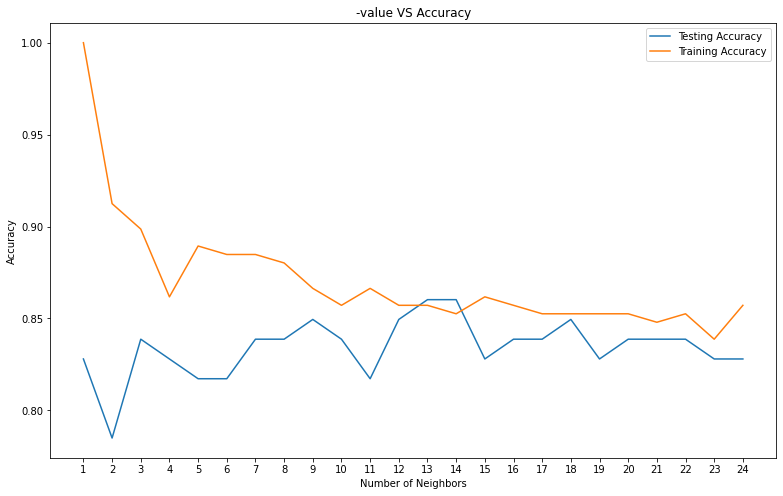

Best accuracy is 0.8602150537634409 with K = 13


In [11]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))